# Problem Statement:

Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Downlaod Files:
    
* https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv

In [1]:
#Import Necessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

#Import Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Feature Description:

* Unnamed:0  - does not contribute in sales will remove it.
* TV  - It refers to the sales count generated from TV advertisement.
* Radio - Here radio refers to the sale count generated from radio advertisement.
* Newspaper - Newspaper column shows the sales count generated from newpaper sales.
* Sales - Sales column refers to the total sales of TV, radio and newspaper.

In [3]:
#Droping Unnamed column
df = df.drop(columns = 'Unnamed: 0')

In [4]:
#Checking dataset again
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Observations and Solution:

* All features are in numerical value. 
* As per the problem statement I'll have to predict the sales hence 'Sales' is my target variable and rest all the features are my independent variable. 
* In sales column I am observing that the numbers are in continuous so it is a regression problem. 
* I will be building some regression models and will compare them according to their metrics, then I am going to choose on the best model to predict Sales count.

In [5]:
#Checking shape of the dataset
df.shape

(200, 4)

In [6]:
#Checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#Checking for null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
#Some stats of the dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# In this dataset we have 200 raws and 4 columns, no object data only float. No Null values are present in the dataset.

# Data Visualization and Preprocessing

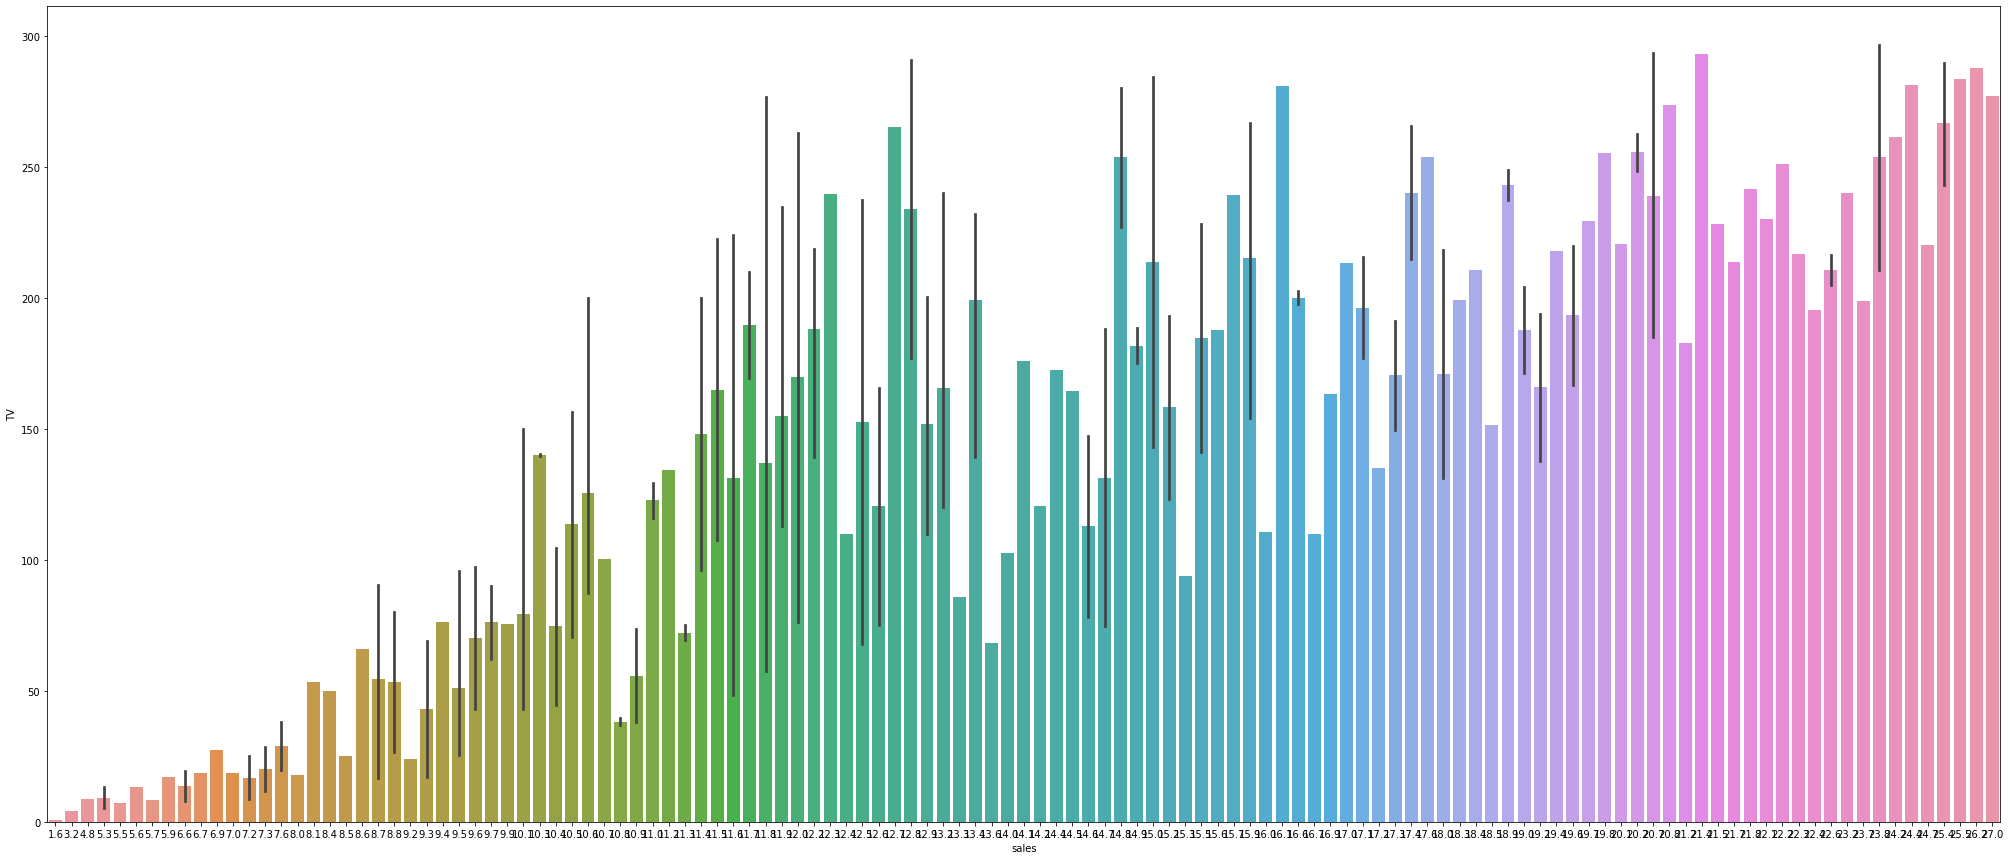

In [9]:
#I will be building a bar plot to analyse Sales vs TV.
plt.figure(figsize = (35,15))
sns.barplot(x = 'sales', y = 'TV', data = df, palette = None )
plt.show()

# From the above barplot I can see strong relationship between TV and Sales, Sales are surely increasing because of TV advertisement.

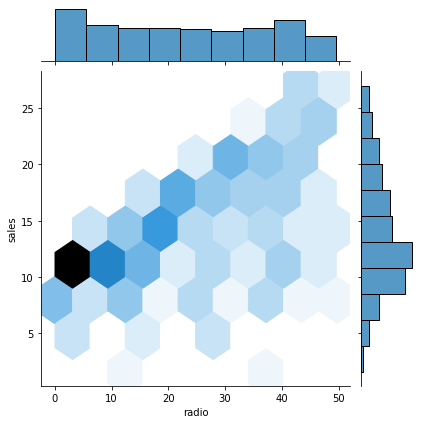

In [10]:
#Next I am going to plot a scatter plot to observe the relationship between Radio and Sales.
sns.jointplot(x ='radio', y ='sales', data = df, kind ='hex')# KDE shows the density where the points match up the most
plt.show()

# Seeing good relationship between radio and sales though this relationship is not as strong as with TV but still I can observe some trend. I can say radio advertisements are surely helping in increasing sales.

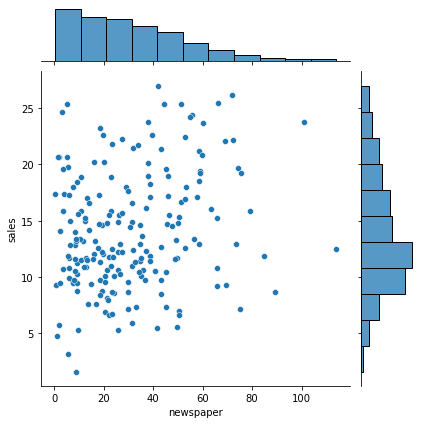

In [11]:
#Checking relationship between newspaper and sales
sns.jointplot(x ='newspaper', y ='sales', data = df)
plt.show()

# In the above scatter plot I can't see any trend. Newspaper advertisements are not really helping in sales.

<Figure size 1152x720 with 0 Axes>

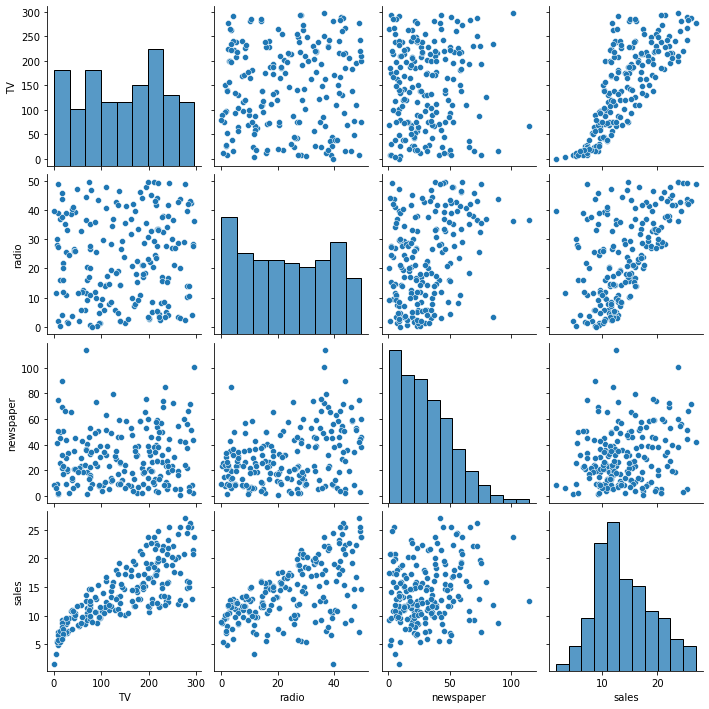

In [12]:
plt.figure(figsize = (16,10))
sns.pairplot(df)
plt.show()

# From the above pair plot I can say that, apart from newspaper rest two features have good relationship with sales. 

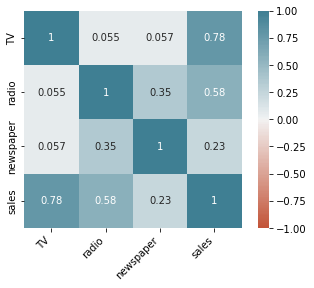

In [13]:
#Checking for correlationship between features
corr = df.corr()
ax = sns.heatmap(
    corr,
    annot = True,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

* TV has strong relationship with Sales.
* Radio has good relationship with Sales and newspaper.
* Newspaper and sales relationship is okay not as storng as TV and Radio.

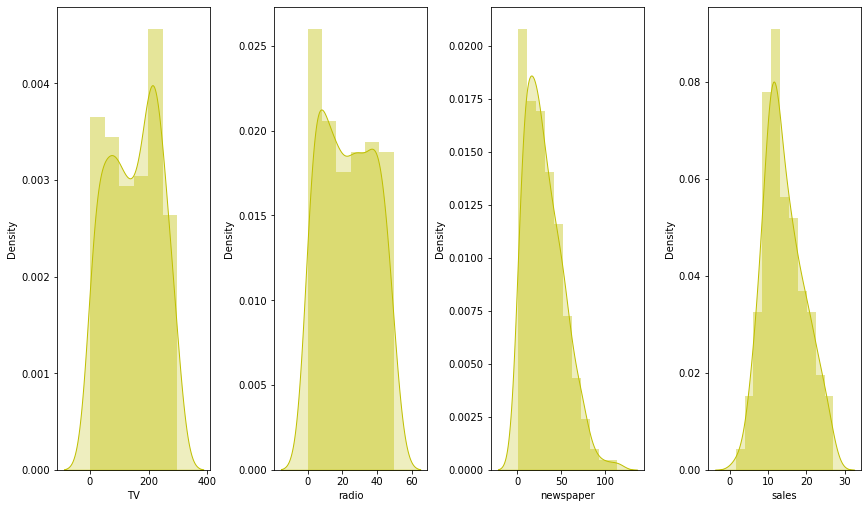

In [14]:
#Checking data distribution.
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax = ax[index], hist = True, color = "y", kde_kws = {"shade": True})
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)
plt.show()

# Distribution looks good for all the features. However seeing some skewness in newpaper. Data looks pretty clean next will check for outliers.

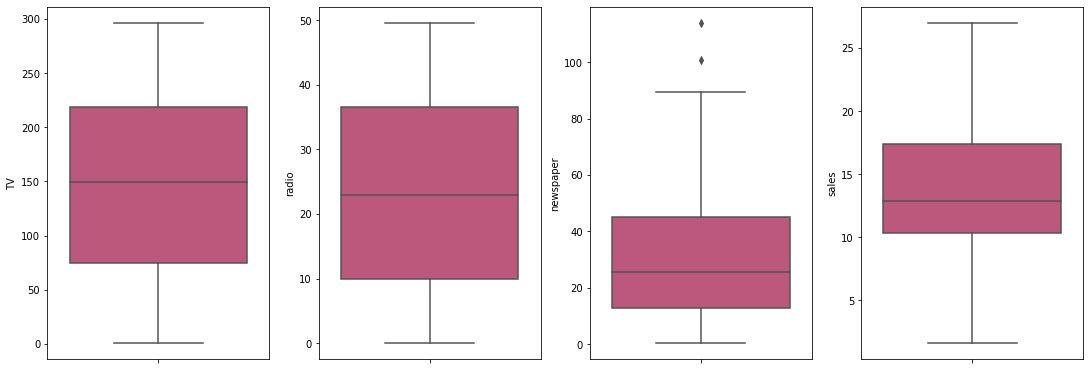

In [15]:
#Will check for outliers using box plot
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (15,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y = col, data = df, ax = ax[index], palette = "plasma")
    index += 1

plt.tight_layout(pad = 0.2, w_pad = 0.9, h_pad = 5.0)
plt.show()

# All the features looks good excluding newspaper. In newspaper I am seeing some outliers are present on the higher side, I will be using Inter Quantile Range method to identify those outliers and then will remove them.

In [16]:
#Remove outliers for newspaper.
def remove_outliers_newspaper(df):
    IQR = df['newspaper'].quantile(0.75) - df['newspaper'].quantile(0.25)
    
    higher_range = df['newspaper'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['newspaper'] >= higher_range, 'newspaper'] = higher_range

In [17]:
#Removing outliers
remove_outliers_newspaper(df)

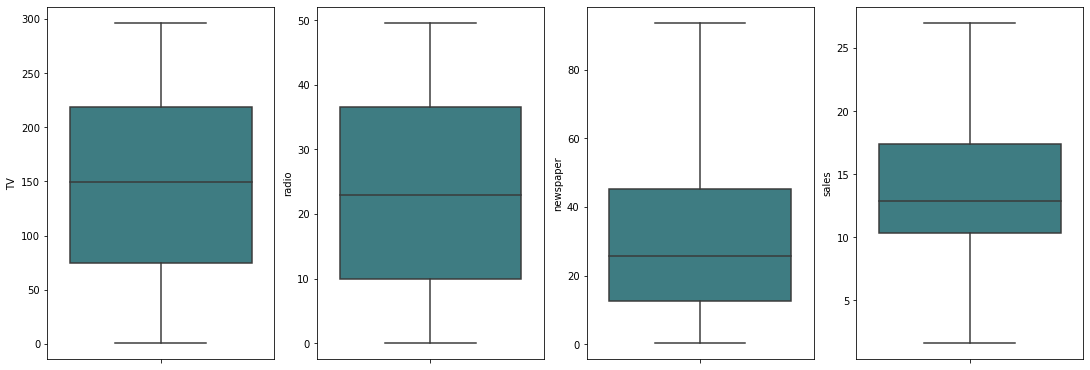

In [18]:
#Ploting box plot again to check if outliers have been removed.
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (15,5))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y = col, data = df, ax = ax[index], palette = "crest")
    index += 1

plt.tight_layout(pad = 0.2, w_pad = 0.9, h_pad = 5.0)
plt.show()

# Outliers have been removed successfully next I am going to check distribution again.

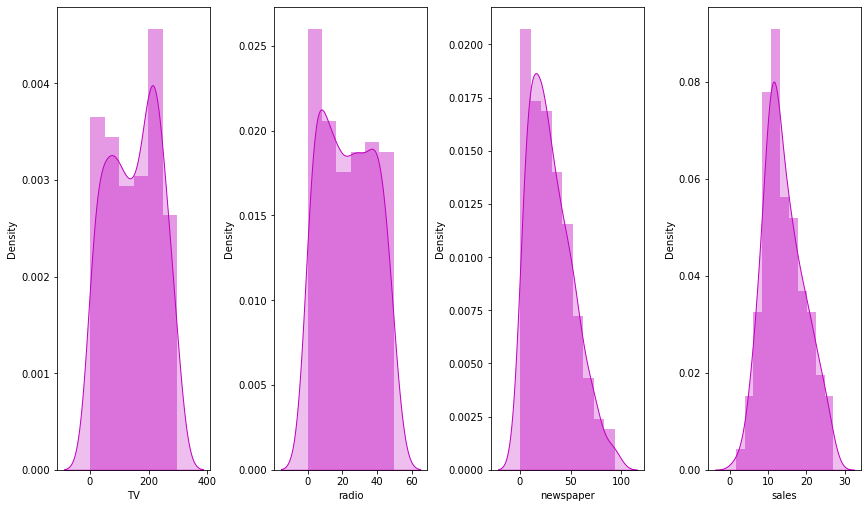

In [19]:
#Checking data distribution.
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax = ax[index], hist = True, color = "m", kde_kws = {"shade": True})
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)
plt.show()

# Distribution looks good. Next I am going to split data into X and Y variable.

In [20]:
#Spliting data into x and y
x = df.drop(columns = 'sales')
y = df['sales']

In [21]:
#Checking x data
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
#Checking y data
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# Scaling X data

In [23]:
#Importing standard scaler
from sklearn.preprocessing import StandardScaler

In [24]:
#Scaling x data
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Checking for correlation using VIF

In [27]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

In [29]:
#Let's check values
vif

,vif,features
0,1.004843,TV
1,1.146581,radio
2,1.147174,newspaper


# No feature has VIF value more than 5 so there is no multicollinearity issue.

# Spliting data into train and test

In [30]:
#Import train test split
from sklearn.model_selection import train_test_split

In [31]:
#Spliting dataset into train and test.
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 7)

# Model Building

In [32]:
#Defining function to fit and check model metrics
def reg(model,x_train,y_train):
    
    #Train models
    model.fit(x_train,y_train)
    
    #Predict x_test
    pred = model.predict(x_test)
    
    #Calculating RMSE score. lower the RMSE is better
    RMSE = mean_squared_error(y_test, pred, squared = False)
    print('RMSE Score is: ', RMSE)
    
    #Calculate R2 score
    R2 = r2_score(y_test, pred, multioutput = 'variance_weighted') * 100
    print('R2 score is: ', R2)
    
    #Calculate cross validation score
    cv = (cross_val_score(model, x, y, cv = 5).mean())*100
    print('Cross Validation Score is: ', cv)
    
    #Calculate the difference between R2 and Cross validation. Lowe is better
    var = R2 - cv
    print('R2 - Cross Validation score is: ', var) 

In [33]:
# Linear Regression Model
model = LinearRegression()
reg(model, x_train, y_train)

RMSE Score is:  1.5585107779213772
R2 score is:  90.95593368967715
Cross Validation Score is:  88.70901371762116
R2 - Cross Validation score is:  2.2469199720559914


In [34]:
# K Neighbors Regressor
model = KNeighborsRegressor(n_neighbors = 5, algorithm = 'kd_tree')
reg(model, x_train, y_train)

RMSE Score is:  1.3516804356059904
R2 score is:  93.19712997404763
Cross Validation Score is:  90.8528217056924
R2 - Cross Validation score is:  2.3443082683552205


In [35]:
# Random Forest Regressor
model = RandomForestRegressor(max_depth = 2, max_features = "sqrt")
reg(model, x_train, y_train)

RMSE Score is:  3.1911587378283373
R2 score is:  62.08239189922089
Cross Validation Score is:  61.180709024378324
R2 - Cross Validation score is:  0.9016828748425638


In [36]:
# Decision Tree Regressor
model = DecisionTreeRegressor(criterion = "poisson", random_state = 0)
reg(model, x_train, y_train)

RMSE Score is:  0.9058145505565695
R2 score is:  96.94491918277986
Cross Validation Score is:  94.18011160320357
R2 - Cross Validation score is:  2.764807579576285


In [37]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor(loss = 'quantile', n_estimators = 200, max_depth = 5)
reg(model, x_train, y_train)

RMSE Score is:  1.4335363406374846
R2 score is:  92.34823661730017
Cross Validation Score is:  93.10387667886077
R2 - Cross Validation score is:  -0.755640061560598


In [38]:
# Ada Boost Regressor
model = AdaBoostRegressor(n_estimators = 300, learning_rate = 1.05, random_state = 42)
reg(model, x_train, y_train)

RMSE Score is:  0.9544887109140592
R2 score is:  96.60776672191362
Cross Validation Score is:  95.84283416799222
R2 - Cross Validation score is:  0.7649325539213976


In [39]:
# Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators = 200, max_features = 'sqrt', n_jobs = 6)
reg(model, x_train, y_train)

RMSE Score is:  1.399342869215763
R2 score is:  92.70891105963457
Cross Validation Score is:  92.89191637067282
R2 - Cross Validation score is:  -0.1830053110382437


# After observing observing metrics for all the models I can conclude that Ada Boost Regressor is giving the best result hence I will be using Ada Boost Regressor to predict sales.

# Feature Selection for the best model

In [42]:

#First I will be checking score without newspaper and then with newspaper to observe model performance
Ada = AdaBoostRegressor(n_estimators = 300, learning_rate = 1.05, random_state = 42)
Ada_boost = Ada.fit(x[['TV', 'radio']], y)
Ada_boost_pred = Ada.predict(x[['TV', 'radio']])

print("R^2: ", r2_score(y, Ada_boost_pred))

R^2:  0.9800022118085705


In [43]:
#Checking score with newspaper
Ada_boost = Ada.fit(x[['TV', 'radio', 'newspaper']], y)
Ada_boost_pred = Ada.predict(x[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, Ada_boost_pred))

R^2:  0.9793900548897898


# After adding newspaper I can see model performance have decreased hence I will be removing 'newspaper' from the dataset.

In [47]:
#Fitting the model with new features
x = df[['TV', 'radio']]
y = df['sales']

x_scaled = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 7)

model = AdaBoostRegressor(n_estimators = 300, learning_rate = 1.05, random_state = 42)
reg(model, x_train, y_train)

RMSE Score is:  1.0162102313270025
R2 score is:  96.1548680813732
Cross Validation Score is:  95.86605971509178
R2 - Cross Validation score is:  0.2888083662814154


# Hyper Parameter Tuning

In [48]:
# Choosing Ada Boost Regressor

params = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

grid = GridSearchCV(AdaBoostRegressor(), params, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [49]:
grid.best_params_

{'learning_rate': 1,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': 42}

In [64]:
models = grid.best_estimator_
model.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=1, loss='exponential', n_estimators=100,
                  random_state=42)

In [65]:
reg(models, x_train, y_train)

RMSE Score is:  1.0008849778801925
R2 score is:  96.26996883874821
Cross Validation Score is:  95.57370365836432
R2 - Cross Validation score is:  0.6962651803838895


# I have tuned the final model but score has came down by some points no issues still this is the best performing model so far hence I will be using it for further prediction.

# Saving the best model

In [66]:
#Importing pickle to save the best model
import pickle

#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(models, open('Ada_model', 'wb'))

In [67]:
#Prediction using the saved model
loaded_model = pickle.load(open('Ada_model','rb'))

In [68]:
#Loading model
sales = loaded_model.predict(x_test)
sales

array([12.48823529, 16.31315789,  7.37142857, 16.93529412,  9.68      ,
        7.61428571,  7.61428571, 12.87142857,  9.375     , 13.60384615,
        7.34545455, 12.18695652, 10.753125  , 10.35555556, 15.45      ,
        5.36428571, 10.5       , 17.5575    , 18.95172414, 10.5       ,
       12.18695652, 20.49125   , 11.35294118, 17.14705882, 11.48125   ,
       14.775     , 22.535     , 13.45      , 19.39130435, 12.90833333,
       14.11304348,  8.45      , 14.64285714, 22.41206897, 19.51090909,
       15.39473684,  6.12727273, 24.63333333, 12.23793103, 13.45      ])

In [69]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
DF = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': sales})
DF.head()

,Actual Sales,Predicted Sales
86,12.0,12.488235
120,15.5,16.313158
22,5.6,7.371429
11,17.4,16.935294
195,7.6,9.680000


# Visualizing Error Residual

In [54]:
#!pip install -U yellowbrick

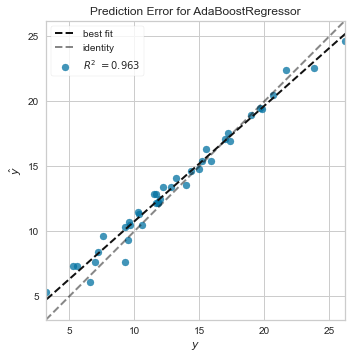

In [73]:
#Importing Prediction Error and Residuals Plot
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(models)

#Fit the training data to the visualizer and evaluate the model on the test data
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof() 
plt.show()

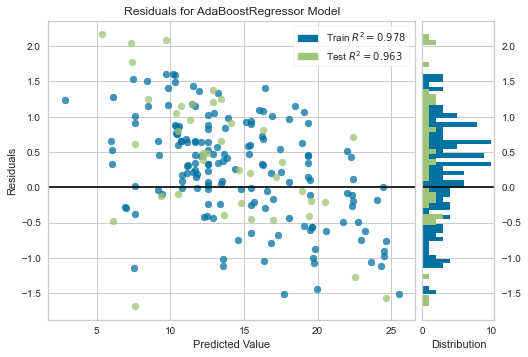

In [75]:
#Residual for Adaboost model
visualizer = ResidualsPlot(models)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.poof()
plt.show()